# Exercise 1

**Instructions**

Tic-tac-toe (or noughts and crosses) is a simple strategy game in which two players take turns placing a mark on a 3x3 board, attempting to make a row, column, or diagonal of three with their mark. In this homework, we will use the tools we've covered in the past two weeks to create a tic-tac-toe simulator, and evaluate basic winning strategies.

- For our tic-tac-toe board, we will use a numpy array with dimension 3 by 3. Make a function ```create_board()``` that creates such a board, with values of integers 0.
- Call ```create_board()```, and store this as board.


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

In [3]:
def create_board():
    return np.array([[0,0,0],[0,0,0],[0,0,0]])

board = create_board()

In [4]:
board

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

# Exercise 2

**Instructions**

- Create a function ```place(board, player, position)```, where:
    - ```player``` is the current player (an integer 1 or 2)
    - ```position``` a tuple of length 2 specifying a desired location to place their marker.
    - Your function should only allow the current player to place a marker on the board (change the board position to their number) if that position is empty (zero).
- Use ```create_board()``` to store a board as board, and use place to have Player 1 place a marker on location (0, 0)

In [5]:
board = create_board()
def place(board, player, position):
    board[position] = player 
    return board

In [6]:
place(board, 1, (0,0))

array([[1, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

# Exercise 3

**Instructions**

- Create a function ```possibilities(board)``` that returns a list of all positions (```tuples```) on the board that are not occupied (0). (Hint: ```numpy.where``` is a handy function that returns a list of indexes that meet a condition.)
- ```board``` is already defined from previous exercises. Call ```possibilities(board)``` to see what it returns!


In [7]:
def possibilities(board):
    a = np.where(board == 0)
    return a

In [8]:
possibilities(board)

(array([0, 0, 1, 1, 1, 2, 2, 2], dtype=int64),
 array([1, 2, 0, 1, 2, 0, 1, 2], dtype=int64))

# Exercise 4

**Instructions**

- Write a function ```random_place(board, player)``` that places a marker for the current player at random among all the available positions (those currently set to 0).
    - Find possible placements with ```possibilities(board)```.
    - Select one possible placement at random using ```random.choice(selection)```.
- ```board``` is already defined from previous exercises. Call ```random_place(board, player)``` to place a random marker for Player 2, and store this as ```board``` to update its value.


In [9]:
def random_place(board,player):
    marker = random.choice(possibilities(board))
    return place(board, player, marker)

In [10]:
random_place(board, 1)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

# Exercise 5

**Instructions**

- ```board``` is already defined from previous exercises. Use ```random_place(board, player)``` to place three pieces on ```board``` each for players 1 and 2.
- Print ```board``` to see your result.


In [11]:
board = create_board()
for i in range(3):
    for player in [1, 2]:
        random_place(board, player)
print(board)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


# Exercise 6

**Instructions**

- Make a function ```row_win(board, player)``` that takes the player (integer), and determines if any row consists of only their marker. Have it return True of this condition is met, and False otherwise.
- ```board``` is already defined from previous exercises. Call ```row_win``` to check if Player 1 has a complete row.


In [12]:
def row_win(board, player):
    return np.array_equal([player, player, player], board)

In [13]:
row_win(board, 1)

False

# Exercise 7

**Instructions**

- Create a similar function ```col_win(board, player)``` that takes the player (integer), and determines if any column consists of only their marker. Have it return True if this condition is met, and False otherwise.
- ```board``` is already defined from previous exercises. Call ```col_win``` to check if Player 1 has a complete column.


In [14]:
def col_win(board, player):
    x = np.array([[player],[player],[player]])
    return np.array_equal(x, board)

In [15]:
col_win(board, 1)

False

In [16]:
col_win(board, 2)

False

# Exercise 8

**Instructions**

- Finally, create a function ```diag_win(board, player)``` that tests if either diagonal of the board consists of only their marker. Have it return True if this condition is met, and False otherwise.
- ```board``` is already defined from previous exercises. Call ```diag_win``` to check if Player 1 has a complete diagonal.


In [17]:
def diag_win(board, player):
    x1 = np.array([[player, 0, 0],[0, player, 0],[0,0,player]])
    x2 = np.array([[0, 0, player],[0, player, 0],[player,0,0]])
    np.any([x1, x2], axis=0)

In [18]:
diag_win(board, 1)

# Exercise 9

**Instructions**

- Create a function ```evaluate(board)``` that uses ```row_win, col_win```, and ```diag_win``` functions for both players. If one of them has won, return that player's number. If the board is full but no one has won, return -1. Otherwise, return 0.
- ```board``` is already defined from previous exercises. Call ```evaluate``` to see if either player has won the game yet.


In [19]:
def evaluate(board):
    winner = 0
    for player in [1, 2]:
        # Check if `row_win`, `col_win`, or `diag_win` apply.  if so, store `player` as `winner`.
        if row_win(board, player) == True:
            winner = player
        elif col_win(board, player) == True:
            winner = player
        #elif diag_win(board, player) == True:
        #    winner = player
    if np.all(board != 0) and winner == 0:
        winner = -1
    return winner

# add your code here.

evaluate(board)

-1

# Exercise 10

**Instructions**

- ```create_board(), random_place(board, player)```, and ```evaluate(board)``` have been created from previous exercises. Create a function ```play_game()``` that:
    - Creates a board.
    - Alternates taking turns between two players (beginning with Player 1), placing a marker during each turn.
    - Evaluates the board for a winner after each placement.
    - Continues the game until one player wins (returning 1 or 2 to reflect the winning player), or the game is a draw (returning -1).
- Call ```play_game``` once.

In [20]:
def play_game():
    board = create_board()
    for i in range(2):
        random_place(board, i)
    evaluate(board)

In [21]:
play_game()

# Exercise 11

**Instructions**

- Use the ```play_game()``` function to play 1,000 random games, where Player 1 always goes first.
- Import and use the ```time ```library to call the ```time()``` function both before and after playing all 1,000 games.
    - Store these times as ```start``` and ```stop```, respectively.
    - Subtract them to evaluate how long it takes to play 1,000 games, and print your answer.
- The library ```matplotlib.pyplot``` has already been stored as ```plt```. Use ```plt.hist()``` and ```plt.show()``` to plot a histogram of the results.
    - Does Player 1 win more than Player 2?
    - Does either player win more than each player draws?

0.00035242626568177116
0.0010008811950683594


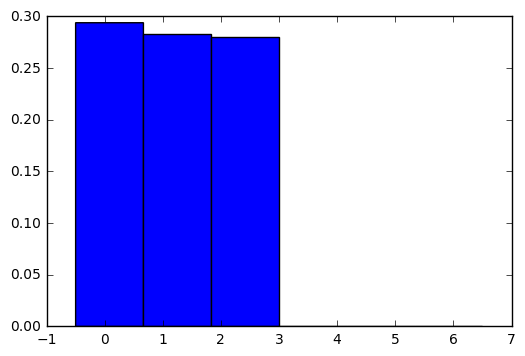

In [22]:
start_time = time.clock()
a = time.time()
#x = np.random.randint(1,play_game()+1,size=1000)
x = np.random.randint(0,3,size=10000)
end_time = time.clock()
b = time.time()
print(end_time - start_time)
print(b-a)
plt.hist(x, normed= True, bins = np.linspace(-0.5, 6.5, 7))
plt.show()

# Exercise 12

**Instructions**


- ```create_board(), random_place(board, player)```, and ```evaluate(board)``` have been created from previous exercises. Create a function ```play_strategic_game()```, where Player 1 always starts with the middle square, and otherwise both players place their markers randomly.
- Call ```play_strategic_game``` once.


In [23]:
def play_strategic_game():
    board, winner = create_board(), 0
    board[1,1] = 1
    while winner == 0:
        for player in [2,1]:
            # use `random_place` to play a game, and store as `board`.
            board = random_place(board, player)
            # use `evaluate(board)`, and store as `winner`.
            winner = evaluate(board)
            if winner != 0:
                break
    return winner

In [24]:
play_strategic_game()

-1

# Exercise 13

**Instructions**

- The results from Exercise 12 have been stored. Use the ```play_strategic_game()``` function to play 1,000 random games.
- Use the ```time``` libary to evaluate how long all these games takes.
- The library ```matplotlib.pyplot``` has already been stored as ```plt```. Use ```plt.hist``` and ```plt.show``` to plot your results. Did Player 1's performance improve? Does either player win more than each player draws?


9.016878628642644e-05
0.0


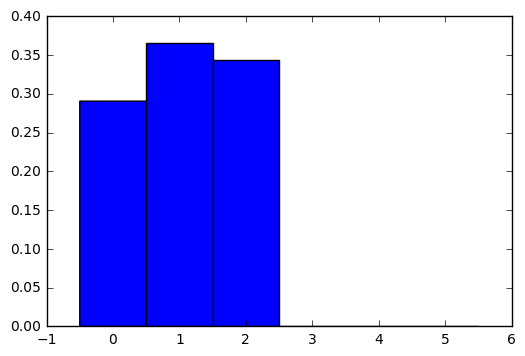

In [33]:
import time
start_time = time.clock()
a = time.time()
#x = np.random.randint(-1,play_strategic_game()+1,size=1000)
x = np.random.randint(-1,3,size=1000)
end_time = time.clock()
b = time.time()
print(end_time - start_time)
print(b-a)
plt.hist(x, normed= True, bins = np.linspace(-0.5, 5.5, 7));
plt.show()